In [5]:
 # Clustering problem for retail Data

import pandas as pd
from sklearn import preprocessing

dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cust_Spend_Data.csv')
cust_data= dataset
cust_data.head()

,Cust_ID,Name,Avg_Mthly_Spend,No_of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,0,A,10000,2,1,1,0
1,1,B,7000,3,0,10,9
2,2,C,7000,7,1,3,4
3,3,D,6500,5,1,1,4
4,4,E,6000,6,0,12,3


In [4]:
cust_data.describe()

,Cust_ID,Avg_Mthly_Spend,No_of_Visits,Apparel_Items,FnV_Items,Staples_Items
count,5.000000,5.000000,5.000000,5.000000,5.00000,5.00000
mean,2.000000,7300.000000,4.600000,0.600000,5.40000,4.00000
std,1.581139,1565.247584,2.073644,0.547723,5.22494,3.24037
min,0.000000,6000.000000,2.000000,0.000000,1.00000,0.00000
25%,1.000000,6500.000000,3.000000,0.000000,1.00000,3.00000
50%,2.000000,7000.000000,5.000000,1.000000,3.00000,4.00000
75%,3.000000,7000.000000,6.000000,1.000000,10.00000,4.00000
max,4.000000,10000.000000,7.000000,1.000000,12.00000,9.00000


In [6]:
data = cust_data.iloc[:,2:6].values
cust_data_standardized = preprocessing.scale(data)
cust_data_standardized = pd.DataFrame(cust_data_standardized)
print(cust_data_standardized)

          0         1         2         3
0  1.928571 -1.401826  0.816497 -0.941513
1 -0.214286 -0.862662 -1.224745  0.984309
2 -0.214286  1.293993  0.816497 -0.513553
3 -0.571429  0.215666  0.816497 -0.941513
4 -0.928571  0.754829 -1.224745  1.412270


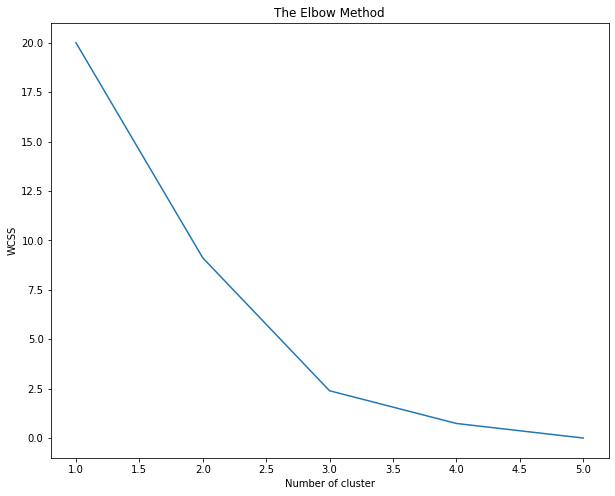

In [12]:
import matplotlib.pyplot as plt  
import pandas as pd  
%matplotlib inline
import numpy as np

plt.figure(figsize=(10,8))
from sklearn.cluster import KMeans
wcss = []
for i in range(1,6):
  kmeans = KMeans(n_clusters= i, init= 'k-means++', random_state = 42)
  kmeans.fit(cust_data_standardized)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,6),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.show()

In [13]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(cust_data_standardized)
#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1
# New Dataframe called cluster
cluster = pd.DataFrame(y_kmeans1)
# Adding cluster to the Dataset1
cust_data['cluster'] = cluster
#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(cust_data.groupby('cluster').mean(),1))
kmeans_mean_cluster

,Cust_ID,Avg_Mthly_Spend,No_of_Visits,Apparel_Items,FnV_Items,Staples_Items
cluster,,,,,,
1,2.5,6750.0,6.0,1.0,2.0,4.0
2,2.5,6500.0,4.5,0.0,11.0,6.0
3,0.0,10000.0,2.0,1.0,1.0,0.0


In [14]:
cust_data

,Cust_ID,Name,Avg_Mthly_Spend,No_of_Visits,Apparel_Items,FnV_Items,Staples_Items,cluster
0,0,A,10000,2,1,1,0,3
1,1,B,7000,3,0,10,9,2
2,2,C,7000,7,1,3,4,1
3,3,D,6500,5,1,1,4,1
4,4,E,6000,6,0,12,3,2
